# Predictive Analysis of Bike Buyers

### Code Summary

1. **Imports and Setup**
Libraries: pandas, numpy, matplotlib, seaborn, plotly, scikit-learn, statsmodels.
Data loading and initial inspection.

2. **Data Analysis**
Examine dataset shape, info, and summary statistics.
Value counts for categorical features and correlation heatmap for numeric features.

3. **Univariate Analysis**
Histograms and boxplots to visualize distributions and detect outliers.

4. **Bivariate Analysis**
Scatter plots to examine relationships between features and bike purchases.
Pairplots for selected features.

5. **Data Preprocessing**
Handle duplicates, missing values, and outliers.
Encode categorical variables and impute missing values.

6. **Exploratory Data Analysis (EDA)**
Visualize trends by marital status, gender, education, and region.
Generate bar plots and facet plots.

7. **Feature Engineering**
Encode categorical variables, perform stratified and systematic sampling.
Compute dissimilarity matrices for different attribute types.

8. **Modeling**
Implement a decision tree from scratch and visualize it.
Fit and evaluate decision tree and random forest models.
Assess model performance with classification metrics and ROC curve.

9. **Logistic Regression**
Fit a logistic regression model and visualize feature coefficients.

## Importing Libraries
Load necessary libraries for data analysis, preprocessing, visualization, and machine learning.

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import plotly.express as px
plt.style.use('default')

import warnings
warnings.filterwarnings('ignore')

## Importing Dataset
Load the dataset bike_buyers.csv into a DataFrame and display the first few rows.

In [3]:
df = pd.read_csv('bike_buyers.csv')
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


## Data Analysis

In [4]:
df.shape

(1000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [6]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [7]:
print(df['Gender'].value_counts())

Gender
Male      500
Female    489
Name: count, dtype: int64


In [8]:
print(df['Education'].value_counts())

Education
Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: count, dtype: int64


In [9]:
print(df['Occupation'].value_counts())

Occupation
Professional      276
Skilled Manual    255
Clerical          177
Management        173
Manual            119
Name: count, dtype: int64


In [10]:
print(df['Marital Status'].value_counts())

Marital Status
Married    535
Single     458
Name: count, dtype: int64


In [11]:
print(df['Region'].value_counts())

Region
North America    508
Europe           300
Pacific          192
Name: count, dtype: int64


In [12]:
print(df['Purchased Bike'].value_counts())

Purchased Bike
No     519
Yes    481
Name: count, dtype: int64


<Axes: >

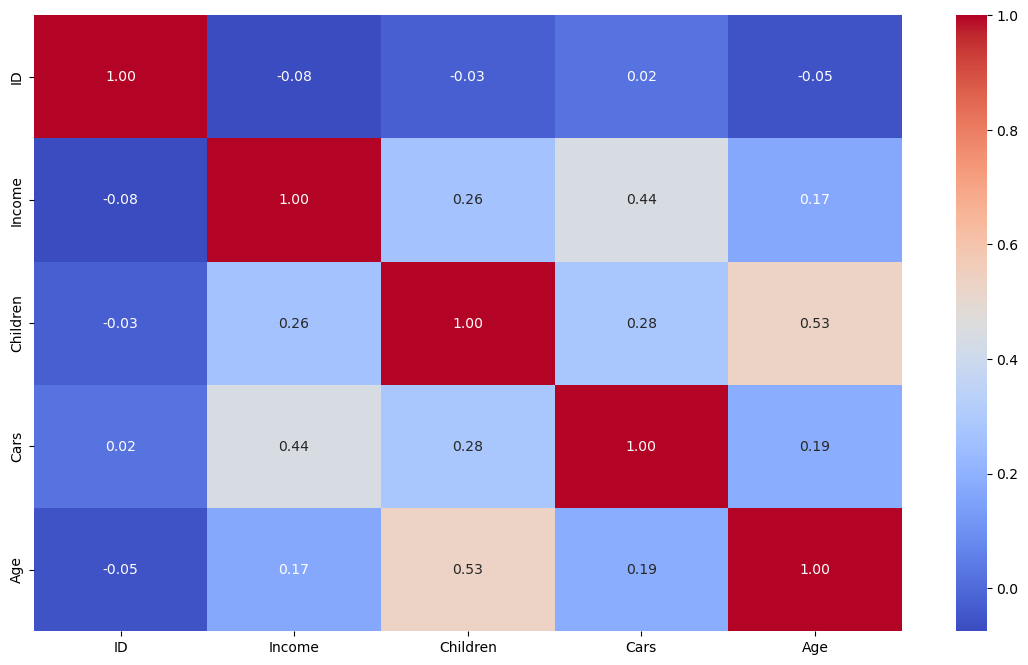

In [13]:
# This heatmap will help you visualize the relationships between numeric features in your dataset.
numeric = df.select_dtypes(include =['int64','float64'])
plt.figure(figsize = (14,8))
sb.heatmap(numeric.corr(), annot= True, cmap ='coolwarm', fmt = '.2f')

In [14]:
# This will give you a clear view of how each numeric feature correlates with other numeric features in the dataset.
cor_data = numeric.corr().round(4)
for k in numeric:
    print(f"\n-------{k}:------")
    print(cor_data[k].sort_values(ascending = False))


-------ID:------
ID          1.0000
Cars        0.0221
Children   -0.0287
Age        -0.0542
Income     -0.0751
Name: ID, dtype: float64

-------Income:------
Income      1.0000
Cars        0.4400
Children    0.2611
Age         0.1708
ID         -0.0751
Name: Income, dtype: float64

-------Children:------
Children    1.0000
Age         0.5317
Cars        0.2802
Income      0.2611
ID         -0.0287
Name: Children, dtype: float64

-------Cars:------
Cars        1.0000
Income      0.4400
Children    0.2802
Age         0.1864
ID          0.0221
Name: Cars, dtype: float64

-------Age:------
Age         1.0000
Children    0.5317
Cars        0.1864
Income      0.1708
ID         -0.0542
Name: Age, dtype: float64


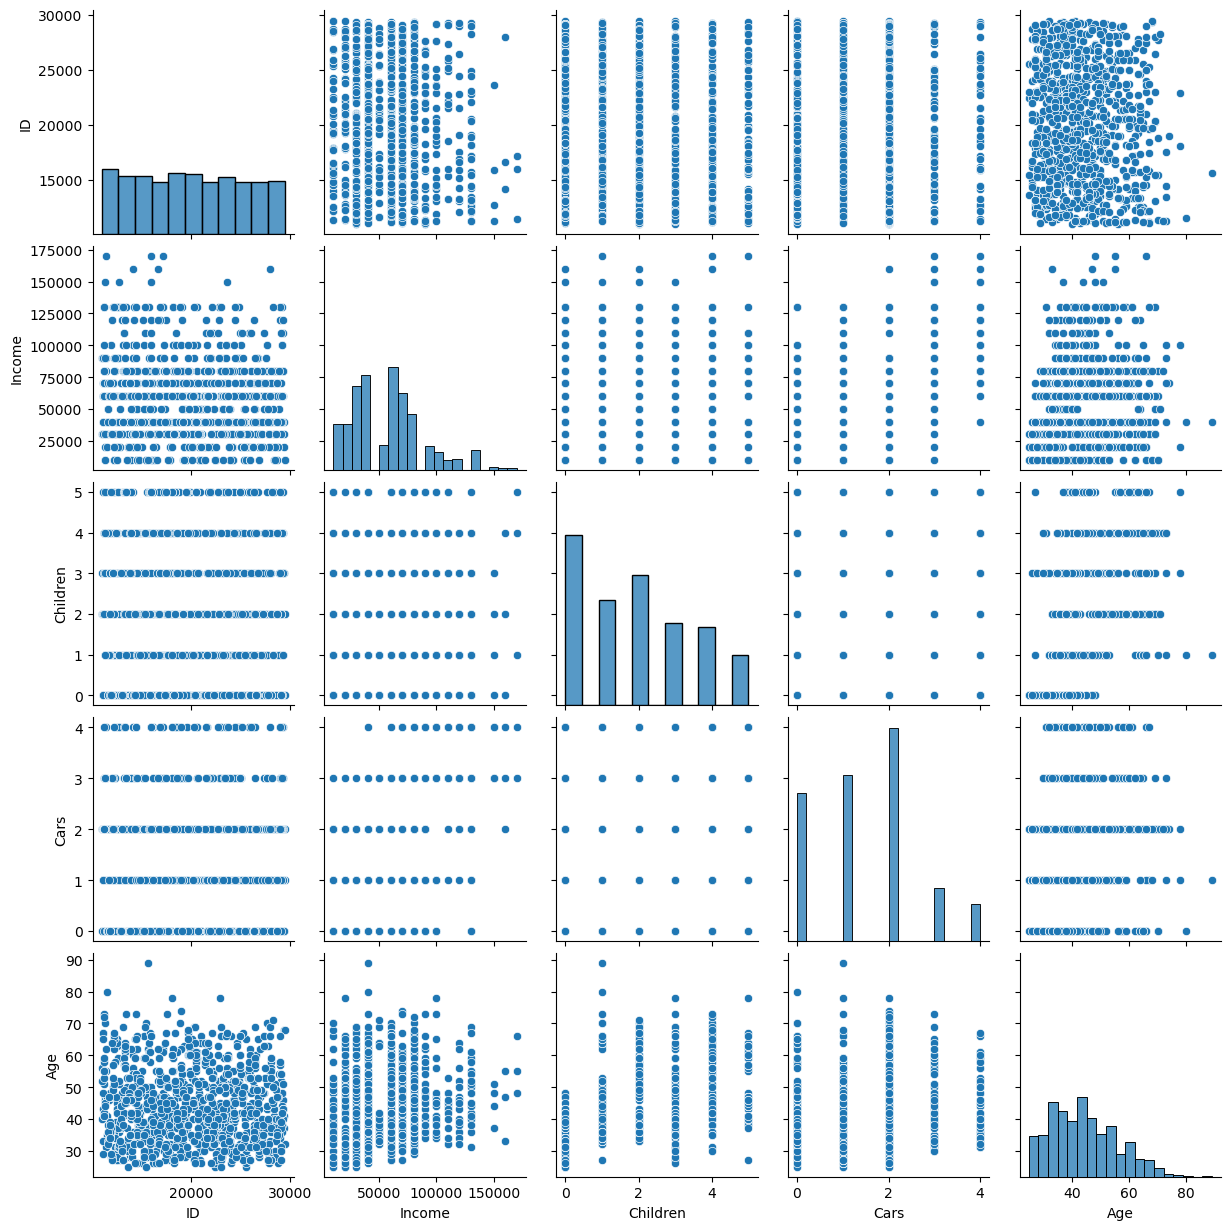

In [15]:
# This will create a pairplot for only the specified subset of features, making the visualization clearer
sb.pairplot(df)

### Univariate Analysis

Plot histograms for numeric features.

Create boxplots to detect outliers.

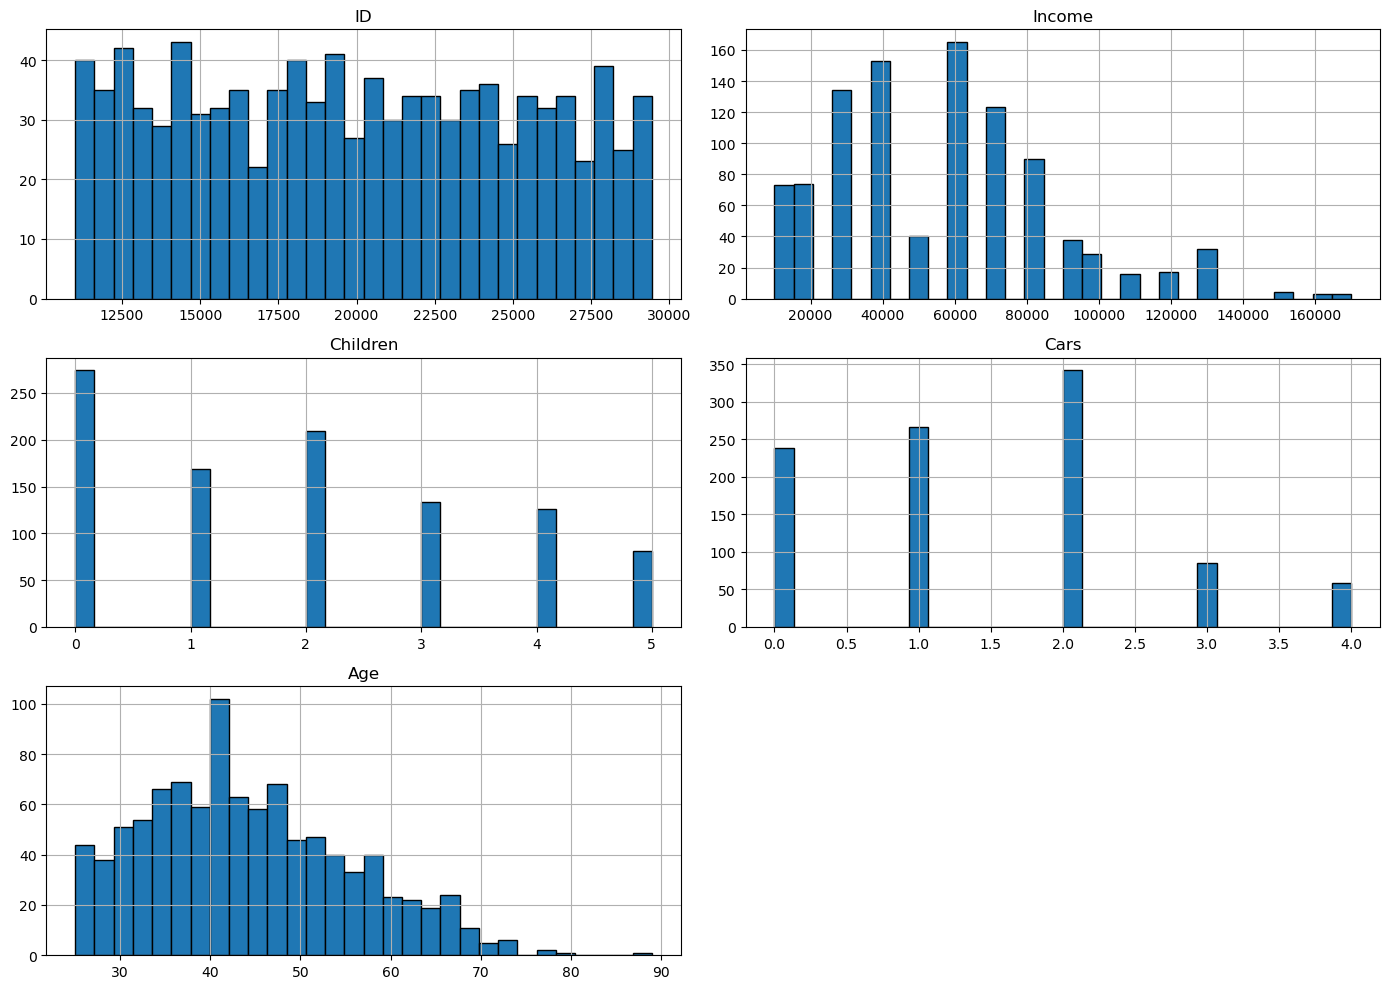

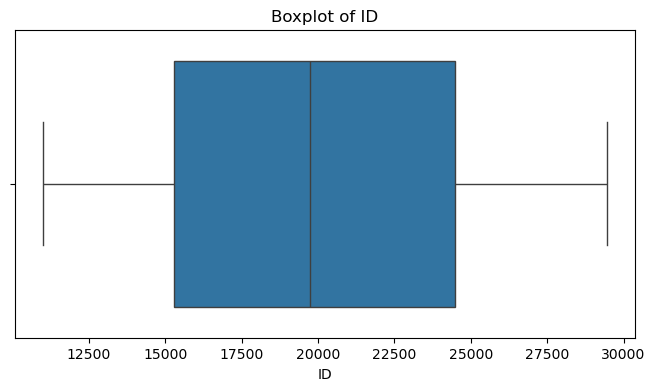

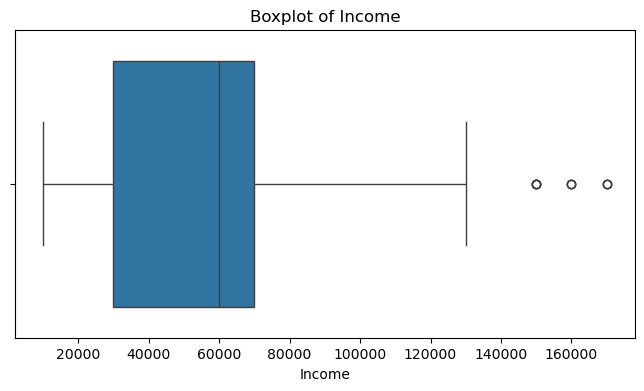

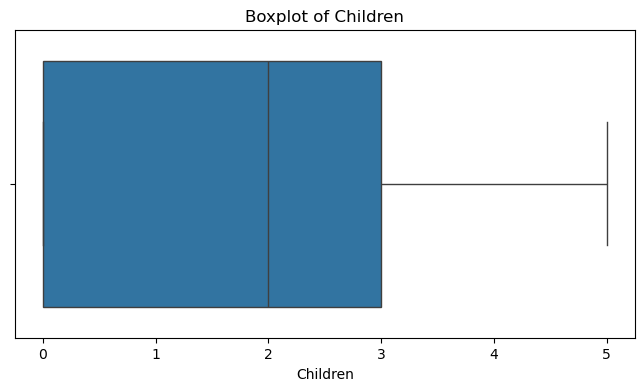

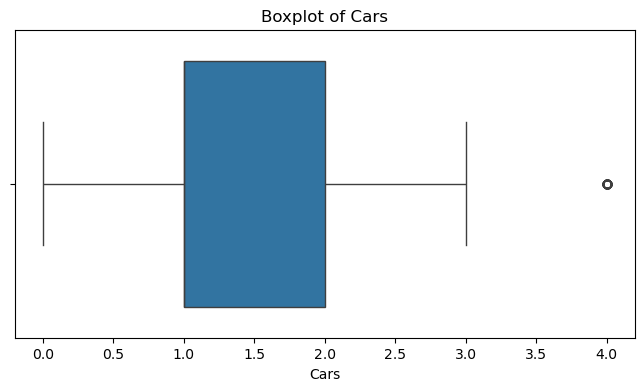

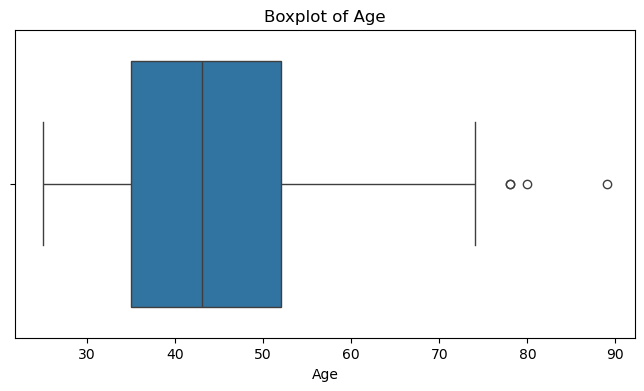

In [16]:
# Plot histograms for numeric features
numeric.hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

# Boxplots to detect outliers
for column in numeric.columns:
    plt.figure(figsize=(8, 4))
    sb.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

###  Bivariate Analysis

Plot scatter plots to examine the relationship between numeric features and bike purchase.

Create pairplot of selected features with 'Purchased Bike' as hue.

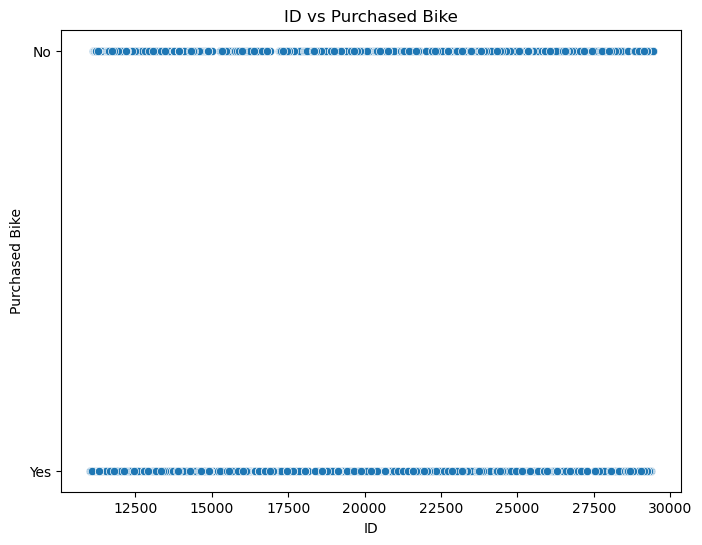

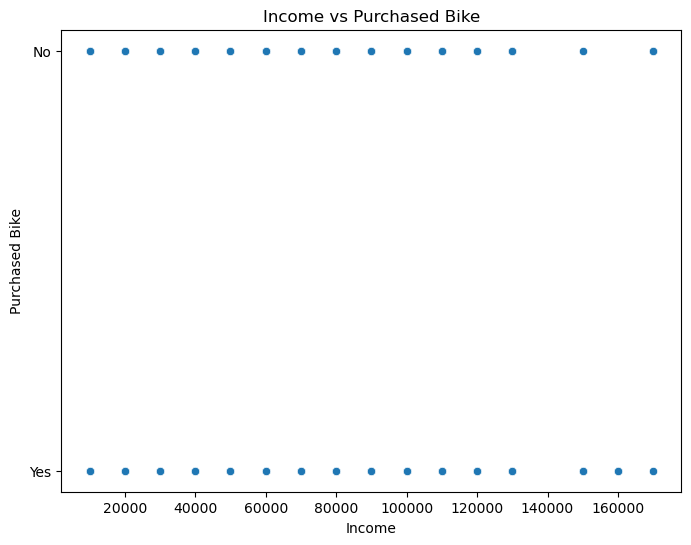

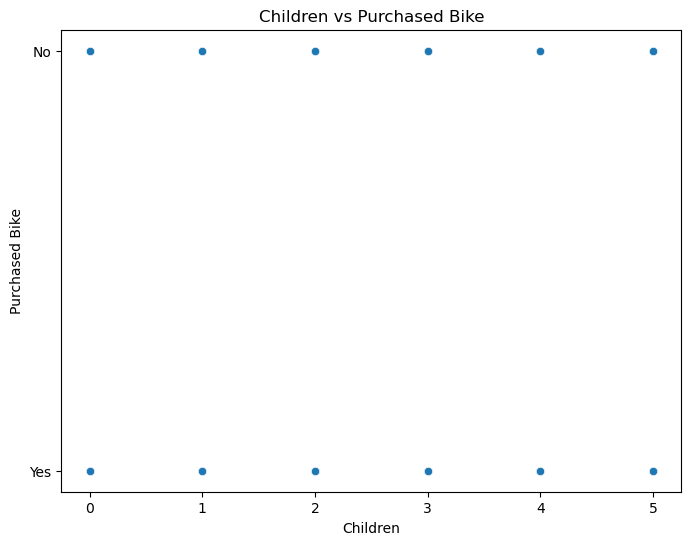

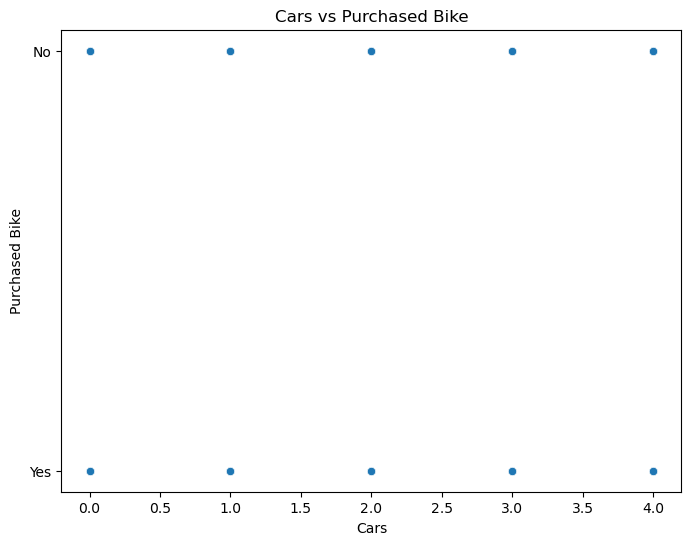

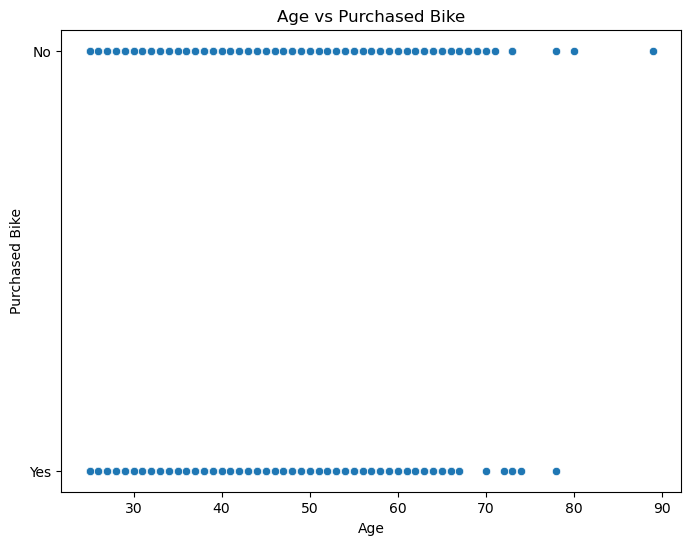

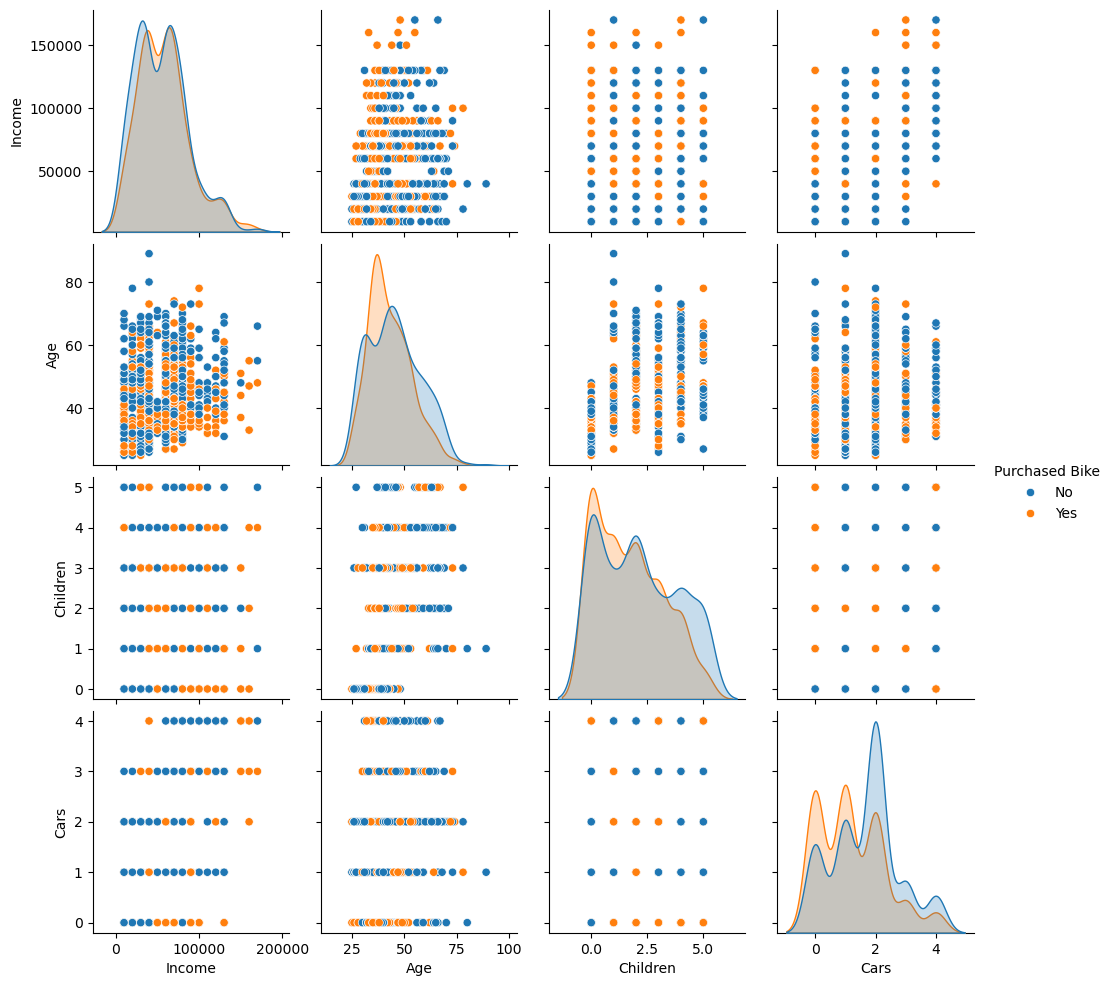

In [17]:
# Scatter plots to examine relationships
for column in numeric.columns:
    plt.figure(figsize=(8, 6))
    sb.scatterplot(x=df[column], y=df['Purchased Bike'])
    plt.title(f'{column} vs Purchased Bike')
    plt.xlabel(column)
    plt.ylabel('Purchased Bike')
    plt.show()

selected_features = ['Income', 'Age', 'Children', 'Cars', 'Purchased Bike']
sb.pairplot(df[selected_features], hue='Purchased Bike')
plt.show()

## Data Pre-Processing

In [18]:
# Check for and handle duplicates
df.duplicated().sum()

0

In [19]:
# Check the missing values
df.isnull().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [20]:
# Drop rows with missing values
numeric_cleaned = numeric.dropna()
numeric_cleaned.isnull().sum()

ID          0
Income      0
Children    0
Cars        0
Age         0
dtype: int64

In [21]:
df1 = df.copy()
df1.isnull().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [22]:
numeric = numeric_cleaned.columns.tolist()
df1[numeric] = numeric_cleaned
df1.isnull().sum()

ID                  29
Marital Status       7
Gender              11
Income              29
Children            29
Education            0
Occupation           0
Home Owner           4
Cars                29
Commute Distance     0
Region               0
Age                 29
Purchased Bike       0
dtype: int64

In [23]:
# This code fills missing values in specific columns with the mode, imputes missing values in the 'Region' column using the distribution of existing values, and then checks for any remaining missing values in the DataFrame.
for col in ['Marital Status', 'Gender', 'Home Owner']:
    mode_val = df1[col].mode()[0]
    df1[col].fillna(mode_val, inplace=True)
    
region_counts = df1['Region'].value_counts(normalize = True)
missing_indices = df1[df1['Region'].isnull()].index
imputed_values = np.random.choice(region_counts.index, size = len(missing_indices), p = region_counts.values)
df1.loc[missing_indices, 'Region'] = imputed_values

df1.isnull().sum()

ID                  29
Marital Status       0
Gender               0
Income              29
Children            29
Education            0
Occupation           0
Home Owner           0
Cars                29
Commute Distance     0
Region               0
Age                 29
Purchased Bike       0
dtype: int64

In [24]:
df1 = df1.dropna()

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 971 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                971 non-null    float64
 1   Marital Status    971 non-null    object 
 2   Gender            971 non-null    object 
 3   Income            971 non-null    float64
 4   Children          971 non-null    float64
 5   Education         971 non-null    object 
 6   Occupation        971 non-null    object 
 7   Home Owner        971 non-null    object 
 8   Cars              971 non-null    float64
 9   Commute Distance  971 non-null    object 
 10  Region            971 non-null    object 
 11  Age               971 non-null    float64
 12  Purchased Bike    971 non-null    object 
dtypes: float64(5), object(8)
memory usage: 106.2+ KB


In [26]:
categorical = df.select_dtypes(include = ['object'])

In [27]:
numeric

['ID', 'Income', 'Children', 'Cars', 'Age']

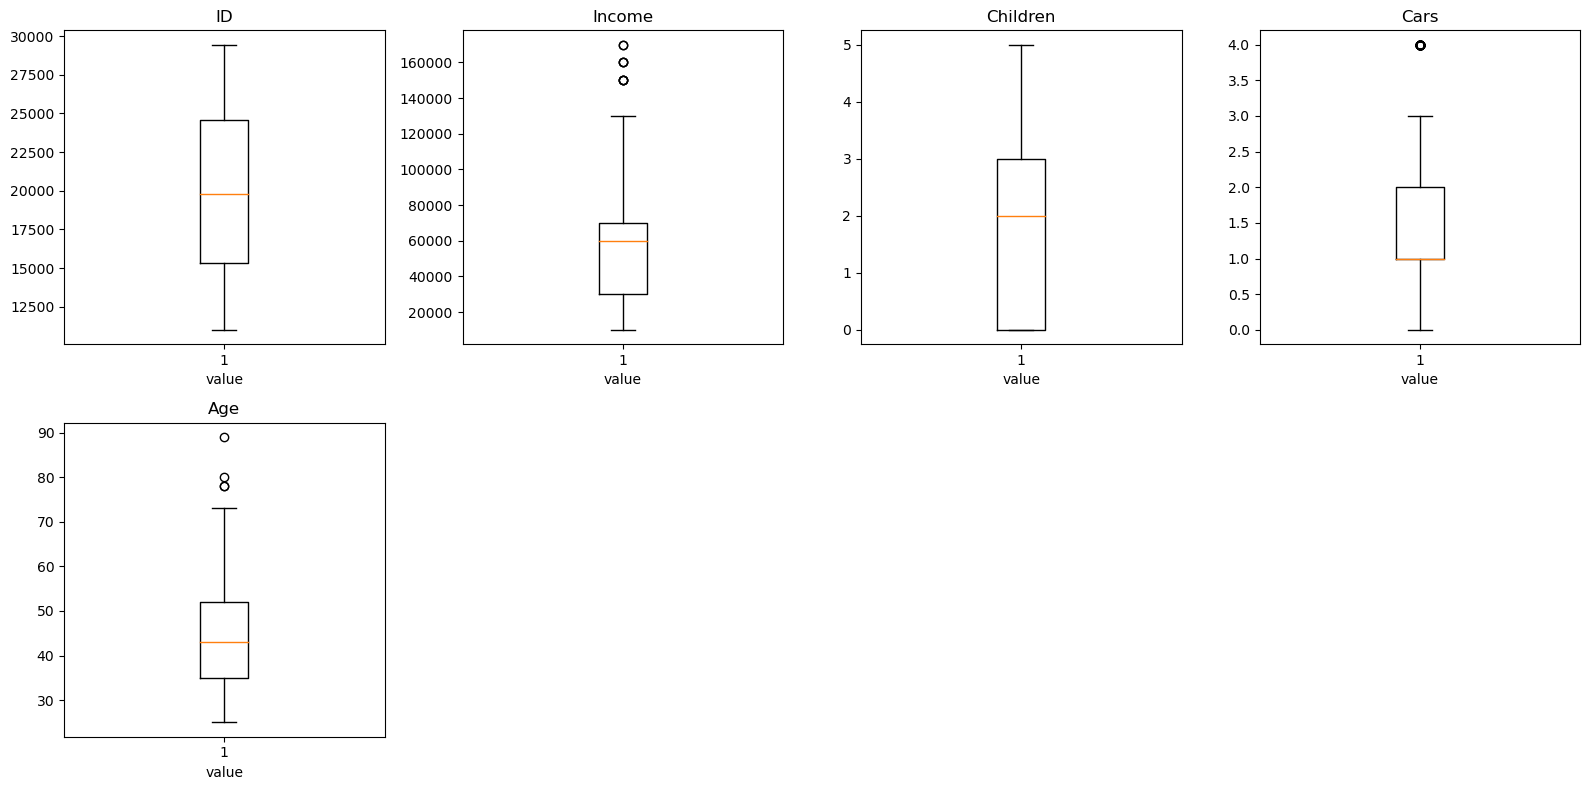

In [28]:
# This code creates a series of boxplots for each numeric column in the DataFrame, arranging them in a grid with a dynamic number of rows based on the number of columns.
import math
nc = df1.select_dtypes(include = ['int64','float64'])

num_col = len(nc.columns)
num_rows = math.ceil(num_col / 4)

plt.figure(figsize = (16, 4 * num_rows))

for i, column in enumerate(nc.columns):
    plt.subplot(num_rows, 4, i +1)
    
    plt.boxplot(nc[column])
    
    plt.title(column)
    
    plt.xlabel('value')
    plt.ylabel('')
    
plt.tight_layout()
plt.show()


In [29]:
# This code calculates Z-scores for the 'Income' and 'Age' columns, identifies rows where either column has Z-scores exceeding a threshold of 3 (indicating outliers), and then prints the rows containing these outliers.
from scipy import stats

z_scores = stats.zscore(df1[['Income','Age']])
threshold = 3
outliers = (abs(z_scores) > threshold).any(axis = 1)
rows_with_outliers = df1[outliers]
print("Rows with Outliers: ")
rows_with_outliers

Rows with Outliers: 


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
6,27974.0,Single,Male,160000.0,2.0,High School,Management,Yes,4.0,0-1 Miles,Pacific,33.0,Yes
43,17185.0,Married,Female,170000.0,4.0,Partial College,Professional,No,3.0,5-10 Miles,Europe,48.0,Yes
121,15922.0,Married,Male,150000.0,2.0,High School,Professional,Yes,4.0,0-1 Miles,Europe,48.0,No
178,14191.0,Married,Male,160000.0,4.0,Partial College,Professional,No,2.0,10+ Miles,Europe,55.0,Yes
259,12705.0,Married,Male,150000.0,0.0,Bachelors,Management,Yes,4.0,0-1 Miles,Pacific,37.0,Yes
321,16675.0,Single,Female,160000.0,0.0,Graduate Degree,Management,No,3.0,0-1 Miles,Pacific,47.0,Yes
356,23608.0,Married,Female,150000.0,3.0,High School,Professional,Yes,3.0,0-1 Miles,Europe,51.0,Yes
375,15628.0,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,1.0,0-1 Miles,Europe,89.0,No
401,11555.0,Married,Female,40000.0,1.0,Bachelors,Clerical,Yes,0.0,0-1 Miles,Europe,80.0,No
829,16009.0,Single,Male,170000.0,1.0,Graduate Degree,Management,No,4.0,0-1 Miles,North America,66.0,No


In [30]:
# This code calculates Z-scores for 'Income' and 'Age' columns, identifies rows where either column has outliers based on a threshold of 3, and replaces the outlier values with the mean of 'Income' and 'Age' respectively.
z_scores = stats.zscore(df1[['Income','Age']])
threshold = 3
outliers = (abs(z_scores) > threshold).any(axis = 1)
average_income = df1['Income'].mean()
average_age = df1['Age'].mean()
df1.loc[outliers, 'Income'] = average_income
df1.loc[outliers, 'Age'] = average_age

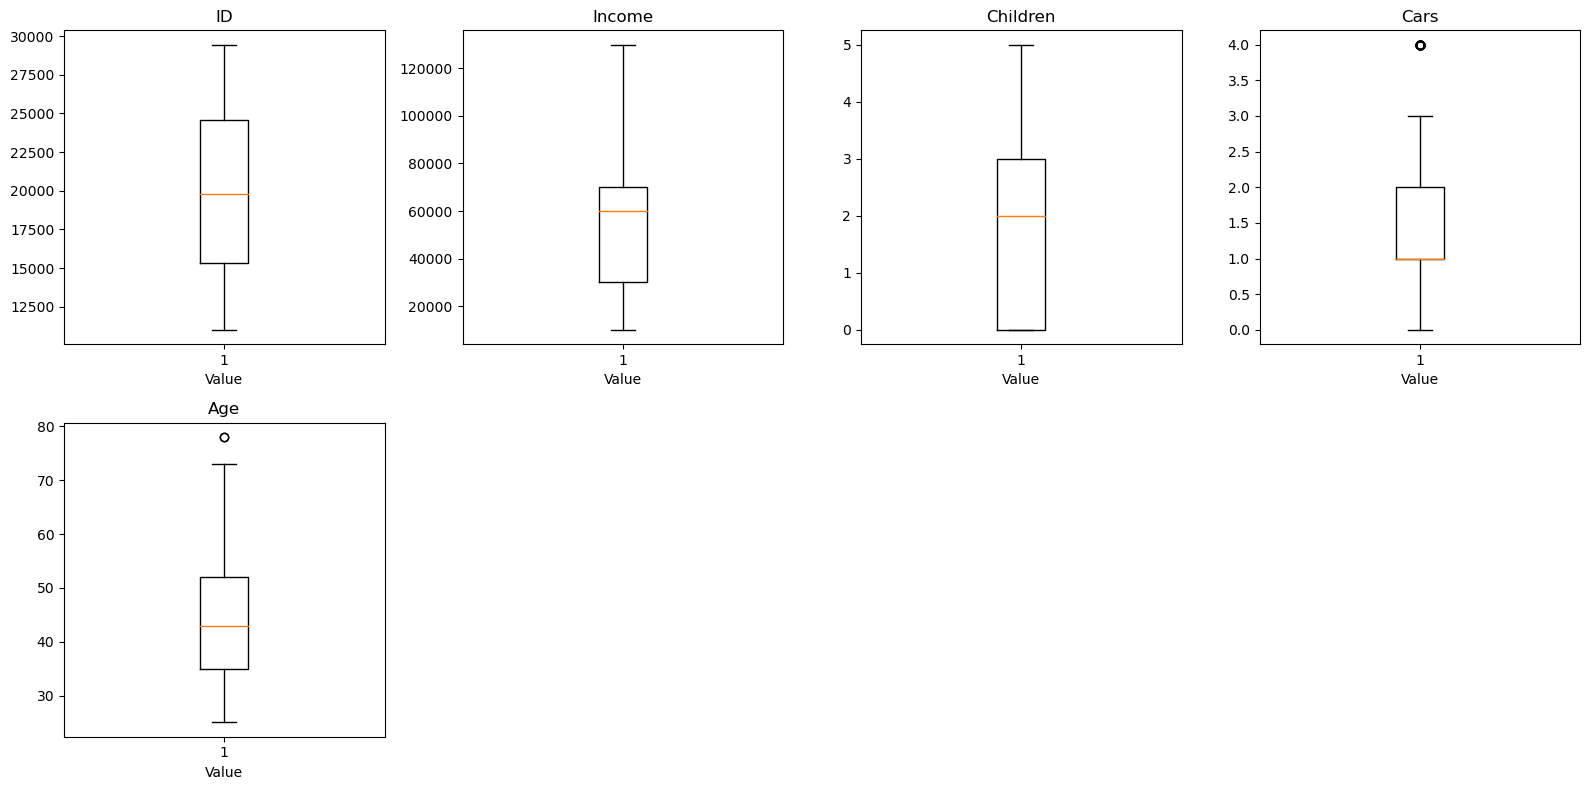

In [31]:
# This code generates a grid of boxplots for each numeric column in the DataFrame `df1`, arranging them into a layout with a number of rows calculated based on the total number of columns, and displays the plot.
import math

nc = df1.select_dtypes(include = ['int64', 'float64'])

num_cols = len(nc.columns)
num_rows = math.ceil(num_cols / 4)

plt.figure(figsize=(16, 4 * num_rows))

for i, column in enumerate(nc.columns):
    plt.subplot(num_rows, 4, i+1)
    plt.boxplot(nc[column])
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('')
        
plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

### 1. How many people with what marital status purchased bike

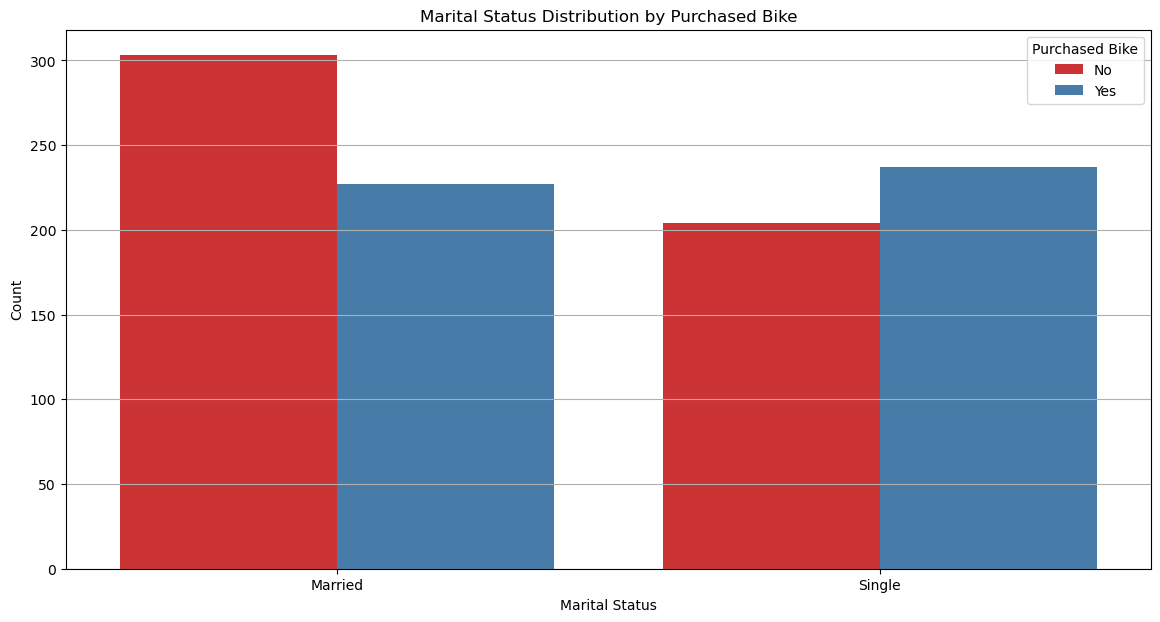

In [32]:
# Plot the distribution of marital status by bike purchases
plt.figure(figsize=(14, 7))

sb.countplot(data=df1, x='Marital Status', hue='Purchased Bike', palette='Set1')

plt.title('Marital Status Distribution by Purchased Bike')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(title='Purchased Bike', loc='upper right')

plt.show()

### 2. People with gender and marital status purchased bike or not

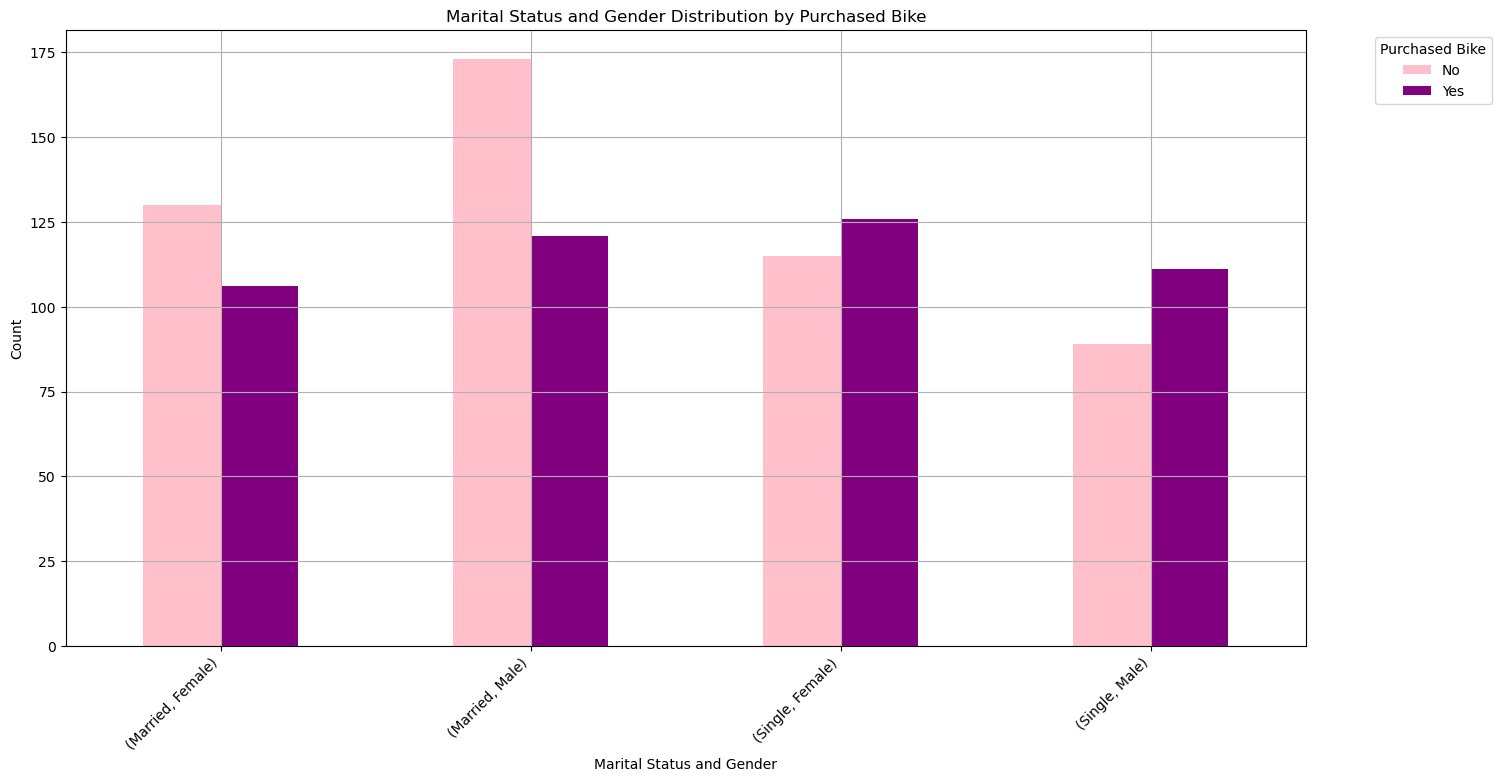

In [33]:
grouped_data =df1.groupby(['Marital Status','Gender','Purchased Bike']).size().unstack(fill_value=0)

colors = ['pink', '#800080']

grouped_data.plot(kind='bar', stacked = False, figsize=(16,8), color=colors)

plt.title('Marital Status and Gender Distribution by Purchased Bike')
plt.xlabel('Marital Status and Gender')
plt.ylabel('Count')
plt.grid()
plt.xticks(rotation=45, ha='right')
plt.legend(title='Purchased Bike', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

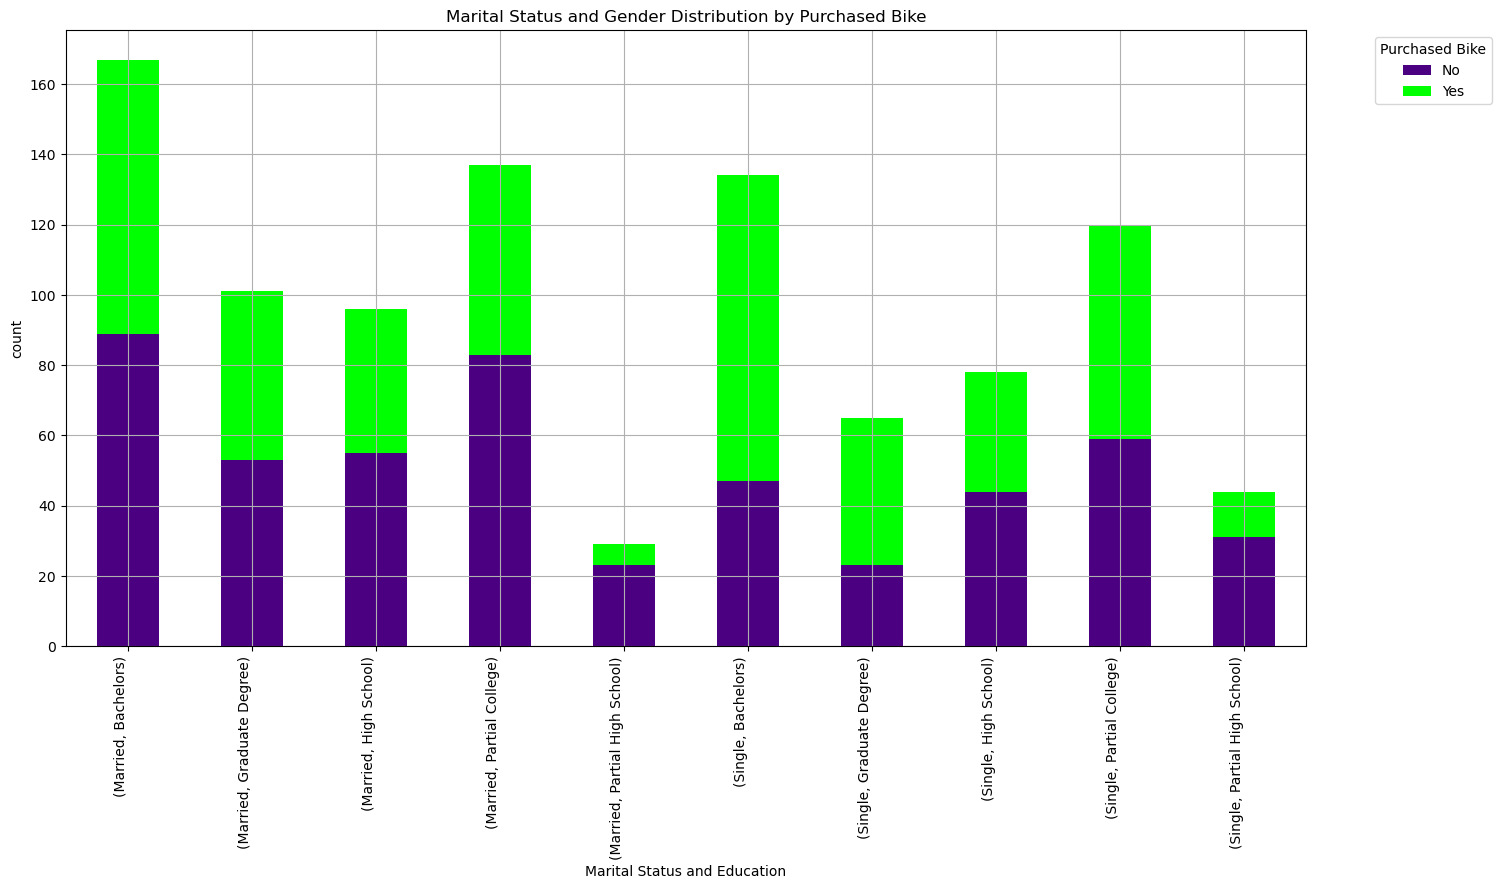

In [34]:
# Stacked Bar Plot

stacked_data = df1.groupby(['Marital Status', 'Education', 'Purchased Bike']).size().unstack(fill_value=0)

colors = ['indigo', '#00FF00']

stacked_data.plot(kind='bar', stacked=True, figsize=(16,8), color=colors)
plt.title('Marital Status and Gender Distribution by Purchased Bike')
plt.xlabel('Marital Status and Education')
plt.ylabel('count')
plt.grid()
plt.xticks(rotation=90, ha='right')
plt.legend(title='Purchased Bike', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


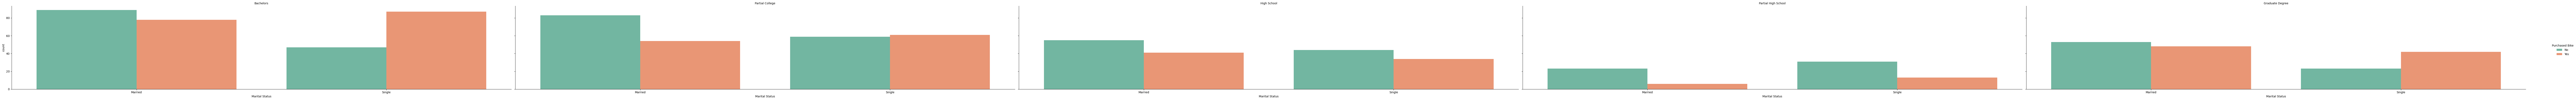

In [35]:
g = sns.catplot(data=df1, kind='count', x='Marital Status', col ='Education', hue='Purchased Bike', palette='Set2', height=5,aspect=5)
g.set_titles('{col_name}')
plt.show()

Married people in each region

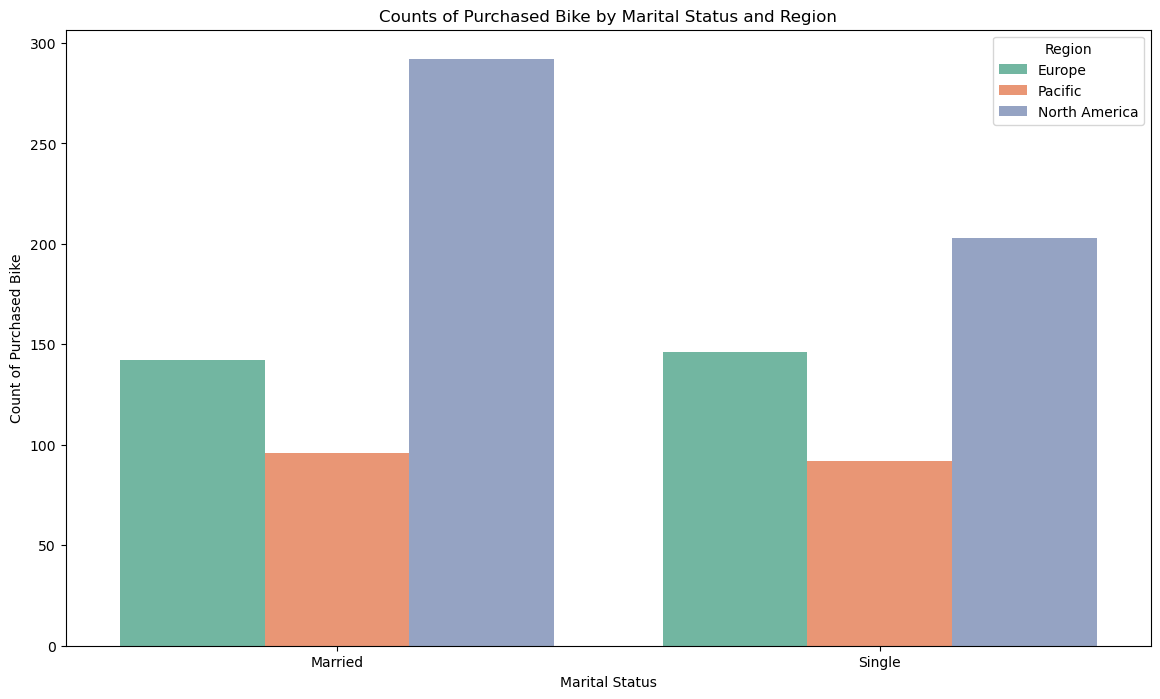

In [36]:
# Clustered Bar Chart

plt.figure(figsize=(14,8))
sns.countplot(data=df1, x='Marital Status', hue='Region', palette='Set2')
plt.title('Counts of Purchased Bike by Marital Status and Region')
plt.xlabel('Marital Status')
plt.ylabel('Count of Purchased Bike')
plt.legend(title='Region', loc='upper right')
plt.show()

Education in each region

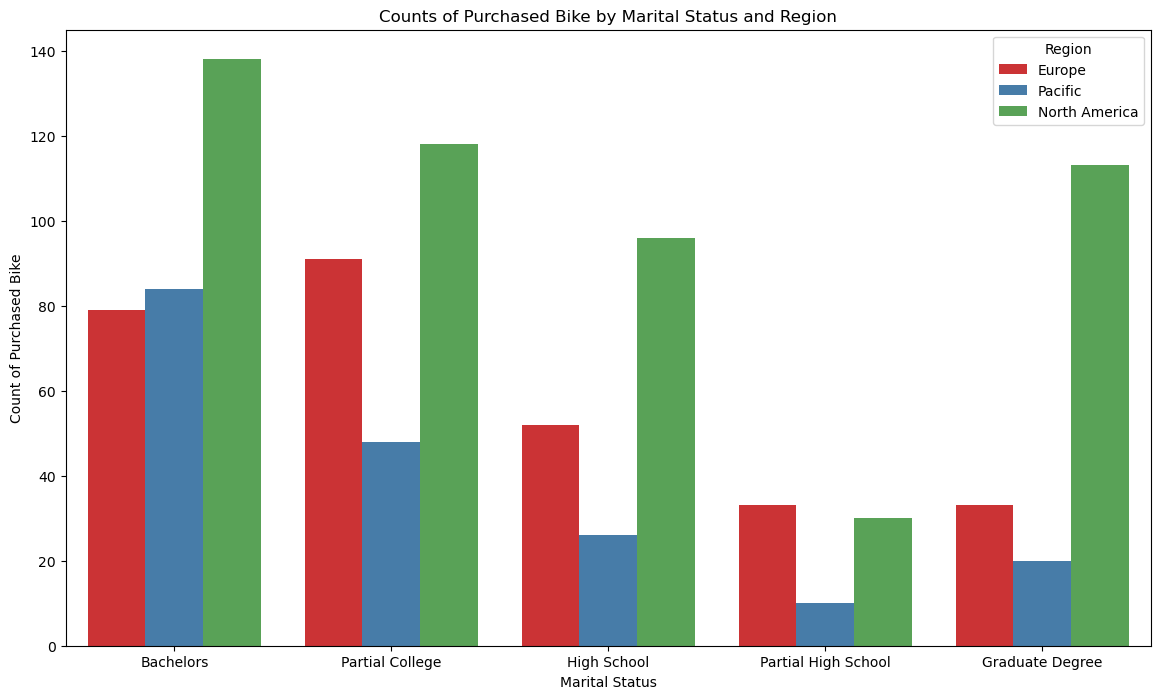

In [37]:
# Clustered Bar Chart
plt.figure(figsize=(14,8))

sns.countplot(data=df1, x ='Education', hue='Region', palette='Set1')
plt.title('Counts of Purchased Bike by Marital Status and Region')
plt.xlabel('Marital Status')
plt.ylabel('Count of Purchased Bike')
plt.legend(title='Region', loc='upper right')
plt.show()

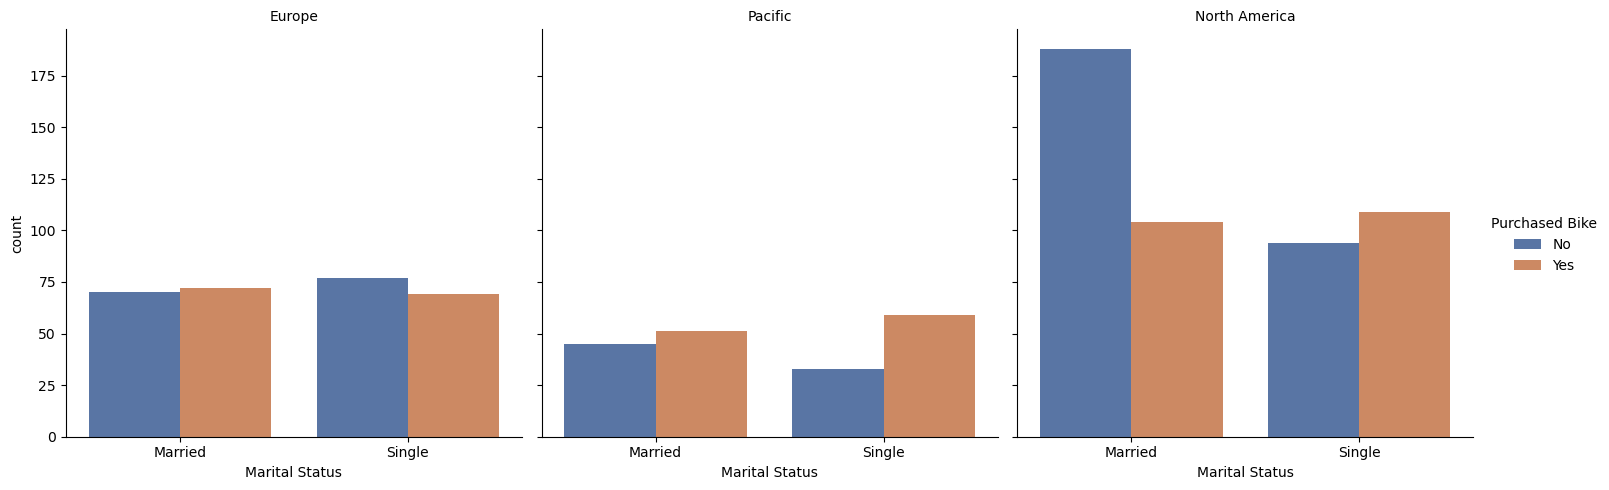

In [38]:
# Faceted Bar Plot

g = sb.catplot(data=df1, kind='count', x='Marital Status', col='Region', hue='Purchased Bike', palette='deep')
g.set_titles('{col_name}')
plt.show()

## Feature Engineering

In [39]:
df1.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

In [40]:
df1['ID']=df1['ID'].astype(int)
df1['Income'] = df1['Income'].astype(int)
df1['Children']=df1['Children'].astype(int)
df1['Cars'] = df1['Cars'].astype(int)
df1['Age']= df1['Age'].astype(int)

In [56]:
df2 = df1.copy()

In [57]:
df2.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [58]:
from sklearn.preprocessing import OneHotEncoder

### Label Encoding

In [59]:
df2['Gender'] = df2['Gender'].map({'Male':1,'Female':0})
df2['Home Owner'] = df2['Home Owner'].map({'Yes':1,'No':0})
df2['Purchased Bike'] = df2['Purchased Bike'].map({'Yes':1,'No':0})
df2['Marital Status'] = df2['Marital Status'].map({'Married':1,'Single':0})
df2.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,1,0,40000,1,Bachelors,Skilled Manual,1,0,0-1 Miles,Europe,42,0
1,24107,1,1,30000,3,Partial College,Clerical,1,1,0-1 Miles,Europe,43,0
2,14177,1,1,80000,5,Partial College,Professional,0,2,2-5 Miles,Europe,60,0
3,24381,0,1,70000,0,Bachelors,Professional,1,1,5-10 Miles,Pacific,41,1
4,25597,0,1,30000,0,Bachelors,Clerical,0,0,0-1 Miles,Europe,36,1


In [60]:
df3 = df2.copy()
df3.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,1,0,40000,1,Bachelors,Skilled Manual,1,0,0-1 Miles,Europe,42,0
1,24107,1,1,30000,3,Partial College,Clerical,1,1,0-1 Miles,Europe,43,0
2,14177,1,1,80000,5,Partial College,Professional,0,2,2-5 Miles,Europe,60,0
3,24381,0,1,70000,0,Bachelors,Professional,1,1,5-10 Miles,Pacific,41,1
4,25597,0,1,30000,0,Bachelors,Clerical,0,0,0-1 Miles,Europe,36,1


In [61]:
education_mapping = {
    'Partial High School': 0,
    'High School': 1,
    'Partial College':2,
    'Bachelors':3,
    'Graduate Degree':4
}

df3['Education'] = df3['Education'].map(education_mapping)

df3.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,1,0,40000,1,3,Skilled Manual,1,0,0-1 Miles,Europe,42,0
1,24107,1,1,30000,3,2,Clerical,1,1,0-1 Miles,Europe,43,0
2,14177,1,1,80000,5,2,Professional,0,2,2-5 Miles,Europe,60,0
3,24381,0,1,70000,0,3,Professional,1,1,5-10 Miles,Pacific,41,1
4,25597,0,1,30000,0,3,Clerical,0,0,0-1 Miles,Europe,36,1


### Random Sampling

In [62]:
random_sample = df3.sample(n=3, random_state=42)

random_sample

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
173,17907,1,0,10000,0,2,Manual,1,1,2-5 Miles,Pacific,27,0
862,22330,1,1,50000,0,4,Skilled Manual,1,0,1-2 Miles,North America,32,1
78,15752,1,1,80000,2,1,Skilled Manual,0,2,1-2 Miles,Pacific,50,1


### Stratified Sampling

In [65]:
stratified_sample, _ = train_test_split(df3, test_size=0.4,
                                        stratify = df3['Purchased Bike'], random_state=42)
stratified_sample.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
566,18847,1,0,60000,2,4,Management,1,2,5-10 Miles,North America,70,0
903,14432,0,1,90000,4,4,Management,1,1,5-10 Miles,North America,73,0
813,25899,1,0,70000,2,1,Professional,1,2,10+ Miles,North America,53,0
73,26956,0,0,20000,0,2,Manual,0,1,2-5 Miles,Europe,36,1
782,16112,0,1,70000,4,3,Professional,1,2,2-5 Miles,North America,43,1


### Systematic Sampling

In [68]:
k = 2
indices = np.arange(0, len(df3), k)
systematic_sample = df3.iloc[indices]

systematic_sample.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,1,0,40000,1,3,Skilled Manual,1,0,0-1 Miles,Europe,42,0
2,14177,1,1,80000,5,2,Professional,0,2,2-5 Miles,Europe,60,0
4,25597,0,1,30000,0,3,Clerical,0,0,0-1 Miles,Europe,36,1
6,27974,0,1,56179,2,1,Management,1,4,0-1 Miles,Pacific,44,1
8,22155,1,1,20000,2,0,Clerical,1,2,5-10 Miles,Pacific,58,0


### Dissimarity Matrix

1. Nominal Attributes: For this example, let's use 'Occupation' and 'Region'.
2. Ordinal Attributes: We'll use 'Education' and 'Commute Distance'.
3. Binary Attributes: We'll use 'Marital Status' and 'Gender'.
4. Numeric Attributes: We'll use 'Income' and 'Age'.


In [69]:
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import pdist, squareform

label_encoders = {}

for column in ['Occupation', 'Region','Education','Commute Distance']:
    le = LabelEncoder()
    df3[column] = le.fit_transform(df3[column])
    label_encoders[column] = le
    
nominal_dissimilarity_matrix = squareform(pdist(df3[['Occupation', 'Region']], metric ='euclidean'))

ordinal_dissimilarity_matrix = squareform(pdist(df3[['Education','Commute Distance']], metric ='euclidean'))



In [73]:
import numpy as np

binary_dissimilarity_matrix = np.zeros((len(df3), len(df3)))
marital_status = df3['Marital Status'].values
gender = df3['Gender'].values

for i in range(len(df3)):
    for j in range(len(df3)):
        if marital_status[i] == marital_status[j] and gender[i] == gender[j]:
            binary_dissimilarity_matrix[i][j] =0
        else:
            binary_dissimilarity_matrix[i][j]=1


In [74]:
numeric_dissimilarity_matrix = squareform(pdist(df3[['Income','Age']], metric = 'euclidean'))

In [79]:
print("Dissimilarity Matrix for Nominal Attributes (Occupation, Region):\n\n", nominal_dissimilarity_matrix)
print("\n\nDissimilarity Matrix for Ordinal Attributes (Education, Commute Distance):\n\n", ordinal_dissimilarity_matrix)
print("\n\nDissimilarity Matrix for Binary Attributes (Marital Status, Gender):\n\n", binary_dissimilarity_matrix)
print("\n\nDissimilarity Matrix for Numeric Attributes (Income, Age):\n", numeric_dissimilarity_matrix)

Dissimilarity Matrix for Nominal Attributes (Occupation, Region):

 [[0.         4.         1.         ... 1.         3.16227766 1.41421356]
 [4.         0.         3.         ... 4.12310563 1.41421356 3.16227766]
 [1.         3.         0.         ... 1.41421356 2.23606798 1.        ]
 ...
 [1.         4.12310563 1.41421356 ... 0.         3.         1.        ]
 [3.16227766 1.41421356 2.23606798 ... 3.         0.         2.        ]
 [1.41421356 3.16227766 1.         ... 1.         2.         0.        ]]


Dissimilarity Matrix for Ordinal Attributes (Education, Commute Distance):

 [[0.         1.         3.16227766 ... 0.         1.         2.82842712]
 [1.         0.         3.         ... 1.         1.41421356 2.23606798]
 [3.16227766 3.         0.         ... 3.16227766 2.23606798 1.41421356]
 ...
 [0.         1.         3.16227766 ... 0.         1.         2.82842712]
 [1.         1.41421356 2.23606798 ... 1.         0.         2.23606798]
 [2.82842712 2.23606798 1.41421356 ... 

## Hunt's Algorithm

In [80]:
df_encoded = df3.copy()

In [89]:
import numpy as np

class Node:
    def __init__(self, attribute= None, value =None, leaf_class=None):
        self.attribute = attribute
        self.value = value
        self.leaf_class = leaf_class
        self.children = {}
    
def entropy(y):
        _, counts = np.unique( y, return_counts = True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities))

def information_gain(X, y, attribute, value):
    left_indices = X[:, attribute] == value
    right_indices = ~left_indices
        
    entropy_before = entropy(y)
    
    entropy_left = entropy(y[left_indices])
    entropy_right = entropy(y[right_indices])

    num_left = np.sum(left_indices)
    num_right = np.sum(right_indices)
    total_instances = len(y)
    information_gain = entropy_before - ((num_left / total_instances) * entropy_left + (num_right / total_instances))
    return information_gain
                                                                                        
def hunt(X, y, attributes):
    if len(np.unique(y)) == 1: 
        return Node(leaf_class=y[0])
    if len(attributes) == 0: 
        return Node(leaf_class=np.argmax(np.bincount(y))) # Return the class with the majority vote
    best_attribute = None
    best_value = None
    best_information_gain = -np.inf
    
    for attribute in attributes:
        unique_values = np.unique(X[:, attribute])
        for value in unique_values:
            gain = information_gain(X, y, attribute, value)
            if gain > best_information_gain:
                best_information_gain = gain
                best_attribute = attribute
                best_value = value
                
    if best_information_gain <= 0:
        return Node(leaf_class=np.argmax(np.bincount(y))) # Return the class with the majority vote
    node = Node(attribute=best_attribute, value=best_value)
    remaining_attributes = [a for a in attributes if a != best_attribute]
    for value in np.unique(X[:, best_attribute]):
        indices = X[:, best_attribute] == value
        child_node = hunt(X[indices], y[indices], remaining_attributes)
        node.children[value] = child_node
    return node
                                                                                        

X = df_encoded.drop(columns=['ID', 'Purchased Bike']).values
y = df_encoded['Purchased Bike'].values
attributes = list(range(X.shape[1]))
                                                                                        

root_node = hunt(X, y, attributes)

                                                                                        
def print_tree(node, depth=0):
    if node.leaf_class is not None:
        print(depth * ' ', 'Predict:', node.leaf_class)
    else:
        print(depth * ' ', 'Attribute:', node.attribute, 'Value:', node.value)
        for value, child_node in node.children.items():
            print(depth * ' ', ' ', 'Value:', value)
            print_tree(child_node, depth + 1)
print_tree(root_node)

 Attribute: 3 Value: 5
   Value: 0
  Attribute: 7 Value: 0
    Value: 0
   Attribute: 9 Value: 0
     Value: 0
    Predict: 1
     Value: 1
    Attribute: 8 Value: 0
      Value: 0
     Predict: 0
      Value: 1
     Attribute: 0 Value: 1
       Value: 0
      Predict: 0
       Value: 1
      Predict: 1
      Value: 3
     Predict: 0
     Value: 2
    Attribute: 2 Value: 20000
      Value: 20000
     Predict: 1
      Value: 100000
     Predict: 1
      Value: 130000
     Attribute: 0 Value: 0
       Value: 0
      Predict: 1
       Value: 1
      Predict: 0
    Value: 1
   Attribute: 2 Value: 40000
     Value: 10000
    Attribute: 10 Value: 26
      Value: 25
     Attribute: 1 Value: 0
       Value: 0
      Predict: 0
       Value: 1
      Predict: 1
      Value: 26
     Predict: 1
      Value: 27
     Predict: 0
      Value: 28
     Predict: 1
     Value: 20000
    Attribute: 4 Value: 1
      Value: 1
     Predict: 0
      Value: 2
     Predict: 1
     Value: 30000
    Attribute: 5 Va

In [91]:
df4 = df2.copy()

In [92]:
df4['Commute Distance'].value_counts()

Commute Distance
0-1 Miles     350
5-10 Miles    187
1-2 Miles     165
2-5 Miles     160
10+ Miles     109
Name: count, dtype: int64

In [93]:
df4['Commute Distance'] = df4['Commute Distance'].str.replace('Miles','')
df4['Commute Distance'] = df4['Commute Distance'].str.replace('10+','10-10')

In [96]:
df4[['minimum_miles', 'maximum_miles']] = df4['Commute Distance'].str.split('-', expand=True)
df4['minimum_miles'] = df4['minimum_miles'].astype(int)
df4['maximum_miles'] = df4['maximum_miles'].astype(int)

df4.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,minimum_miles,maximum_miles
0,12496,1,0,40000,1,Bachelors,Skilled Manual,1,0,0-1,Europe,42,0,0,1
1,24107,1,1,30000,3,Partial College,Clerical,1,1,0-1,Europe,43,0,0,1
2,14177,1,1,80000,5,Partial College,Professional,0,2,2-5,Europe,60,0,2,5
3,24381,0,1,70000,0,Bachelors,Professional,1,1,5-10,Pacific,41,1,5,10
4,25597,0,1,30000,0,Bachelors,Clerical,0,0,0-1,Europe,36,1,0,1


## Decision Tree

In [98]:
df_encoded = df3.copy()

In [99]:
# Trains a Decision Tree classifier using features from `df_encoded` to predict bike purchases, with a random state set for reproducibility.
from sklearn.tree import DecisionTreeClassifier

X = df_encoded.drop(columns =['ID', 'Purchased Bike'])
Y = df_encoded['Purchased Bike']

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X,y)

DecisionTreeClassifier(random_state=42)

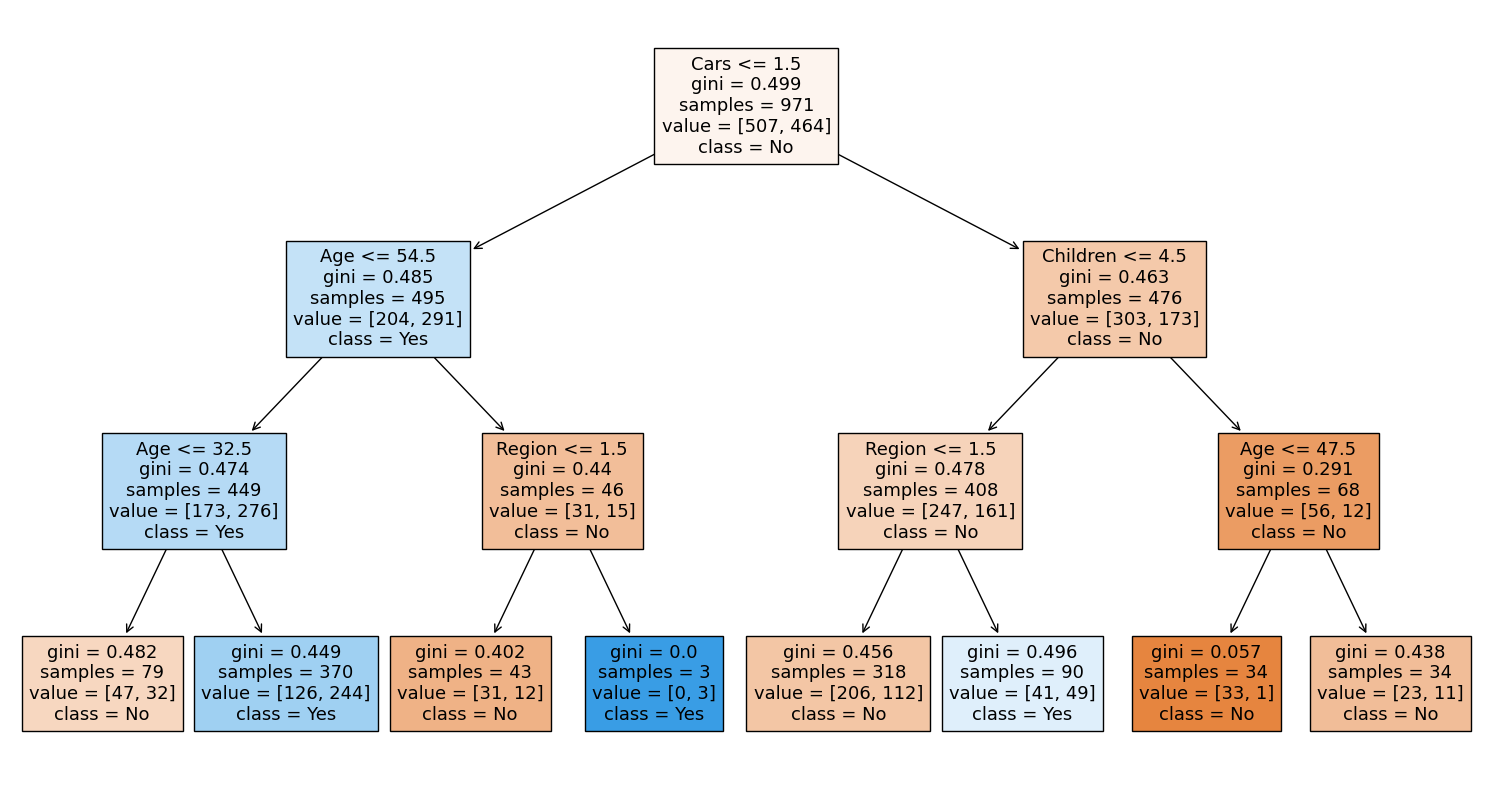

In [104]:
# Trains a Decision Tree classifier with a maximum depth of 3, visualizes the tree structure with feature and class labels using `plot_tree`.
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X, y)

plt.figure(figsize=(19, 10))
plot_tree(decision_tree, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True)
plt.show()


## Classification

In [103]:
# Generates and prints a classification report, evaluating the performance of a Decision Tree model on the dataset.
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X)

classification_report = classification_report(y, y_pred, target_names=['No', 'Yes'])
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

          No       0.67      0.67      0.67       507
         Yes       0.64      0.64      0.64       464

    accuracy                           0.65       971
   macro avg       0.65      0.65      0.65       971
weighted avg       0.65      0.65      0.65       971



## Feature Importance using Random Forest

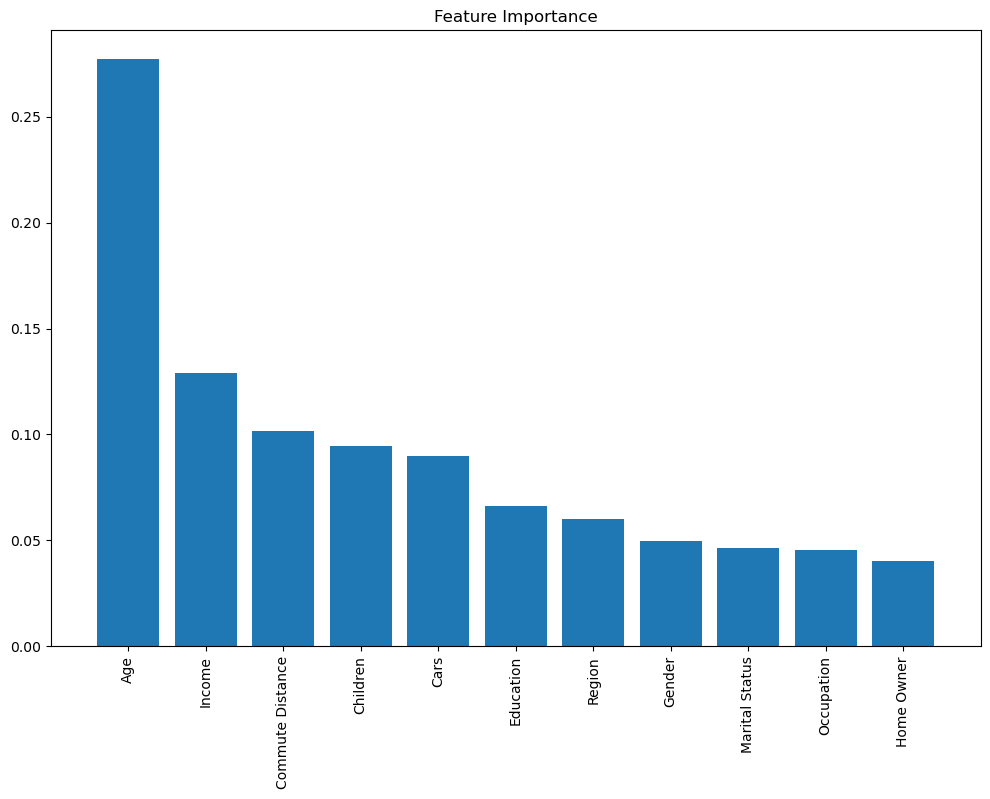

In [105]:
# Trains a Random Forest model, extracts feature importances, and visualizes them in a bar chart.

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


## Confusion Matrix and ROC Curve

Confusion Matrix:
[[340 167]
 [168 296]]


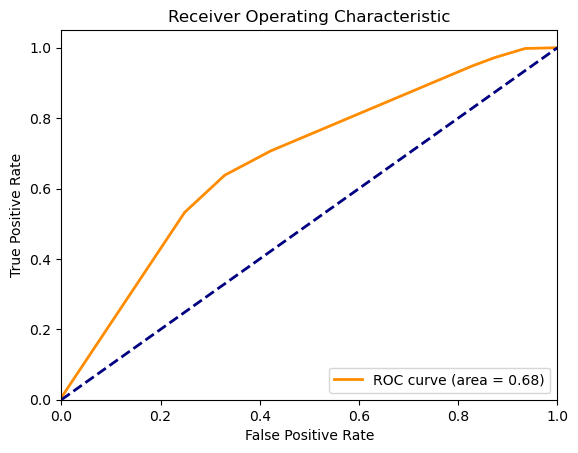

In [106]:
# Evaluates and visualizes a decision tree model's performance using confusion matrix and ROC curve with AUC.

from sklearn.metrics import confusion_matrix, roc_curve, auc

y_pred = decision_tree.predict(X)
conf_matrix = confusion_matrix(y, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')

fpr, tpr, _ = roc_curve(y, decision_tree.predict_proba(X)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Feature Scaling and Logistic Regression

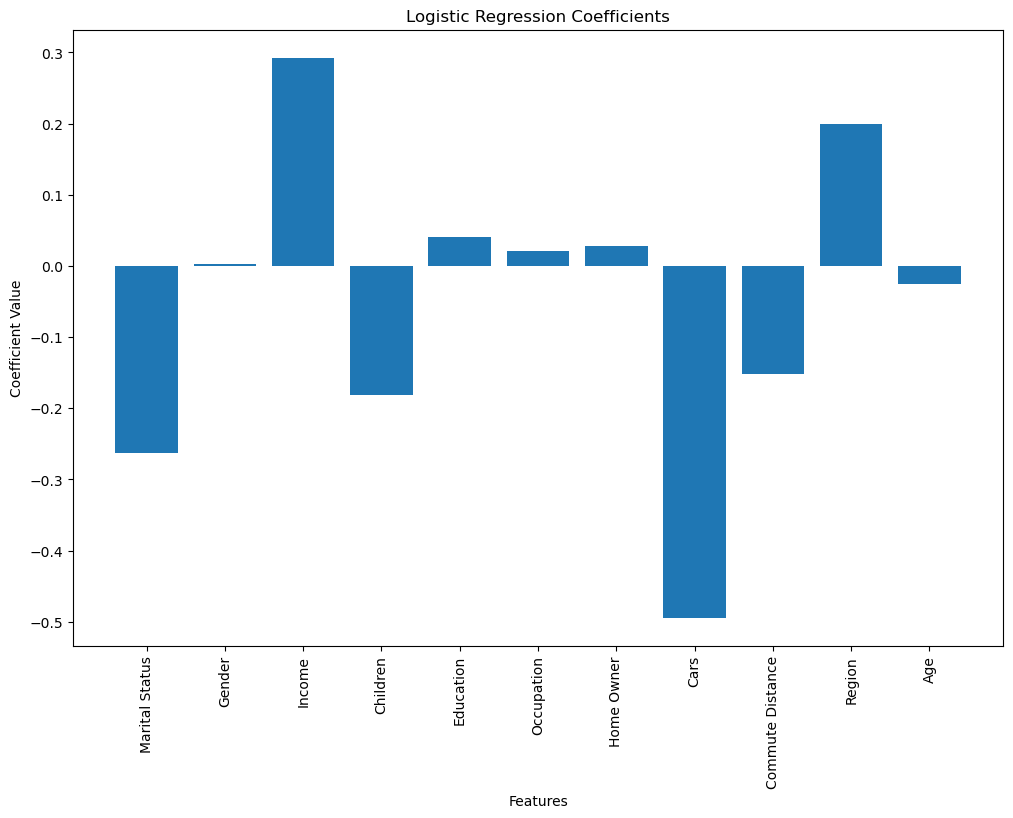

In [108]:
# Logistic Regression: Standardize features, fit a logistic regression model, and plot coefficients.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_scaled, y)

coefficients = log_reg.coef_[0]
plt.figure(figsize=(12, 8))
plt.bar(X.columns, coefficients)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90)
plt.show()
